In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(1, "../../python/")
import util
import plotting

In [2]:
import seaborn as sns

sns.set_style("ticks")
sns.set_palette("colorblind")

In [3]:
from matplotlib import ticker
import matplotlib as mpl

# original data + previous supplemental sampling

In [4]:
cv_trajs = list(
    np.load("../../data/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True)
)
cv_trajs.extend(
    np.load("../../data/raw_feat/cv_dist_spin_suppl_00.npy", allow_pickle=True)
)
cv_trajs.extend(
    np.load("../../data/raw_feat/cv_dist_spin_suppl_01.npy", allow_pickle=True)
)
cv_trajs.extend(
    np.load("../../data/raw_feat/cv_dist_spin_suppl_02.npy", allow_pickle=True)
)

In [5]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_labels.append(f"{r} - {n}")

In [6]:
sb_trajs = list(np.load("../../data/raw_feat/feat2_raw_anton.npy", allow_pickle=True))
for i in range(6):
    sb_trajs.extend(
        np.load(f"../../data/raw_feat/feat2_suppl_{i:02d}.npy", allow_pickle=True)
    )

In [7]:
cv_arr = np.concatenate(cv_trajs)
sb_arr = np.concatenate(sb_trajs)
print(cv_arr.shape, sb_arr.shape)

(3729000, 2) (3729000, 60)


In [8]:
traj_files = np.loadtxt("../../data/suppl_traj_files.txt", dtype=str)

# Plot new sampling data

In [9]:
import random

random.seed(123)

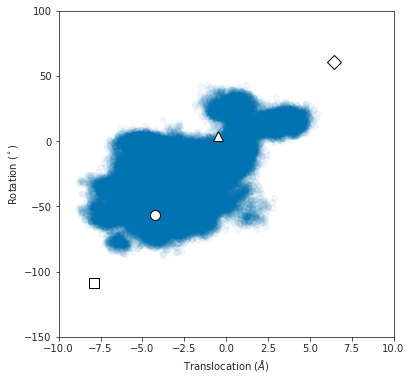

In [10]:
new_cv_arr = np.concatenate(cv_trajs[237:])
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)

N = len(new_cv_arr)
skip = 5
inds = random.sample(range(N), N // skip)
ax.scatter(new_cv_arr[inds, 0], new_cv_arr[inds, 1], alpha=0.05)
plotting.format_cvs(ax, centroids=True)

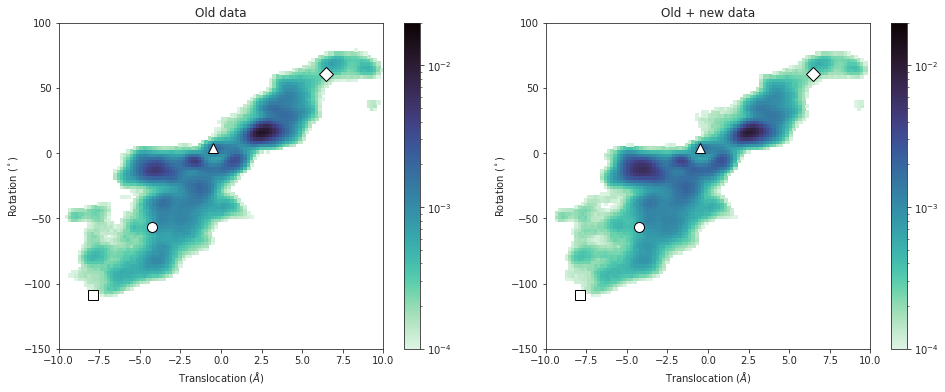

In [11]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))

e = 3_000_000
norm = mpl.colors.LogNorm(vmin=1e-4, vmax=2e-2)
_, _, _, h0 = ax0.hist2d(
    cv_arr[:e, 0],
    cv_arr[:e, 1],
    bins=100,
    range=[[-10, 10], [-150, 100]],
    cmin=0.0001,
    density=True,
    cmap="mako_r",
    norm=norm,
)
_, _, _, h1 = ax1.hist2d(
    cv_arr[:, 0],
    cv_arr[:, 1],
    bins=100,
    range=[[-10, 10], [-150, 100]],
    cmin=0.0001,
    density=True,
    cmap="mako_r",
    norm=norm,
)
f.colorbar(h0, ax=ax0)
f.colorbar(h1, ax=ax1)
ax0.set_title("Old data")
ax1.set_title("Old + new data")
plotting.format_cvs(ax0, centroids=True)
plotting.format_cvs(ax1, centroids=True)

In [12]:
from itertools import combinations

In [13]:
sb_ids = [42, 48, 47, 53]

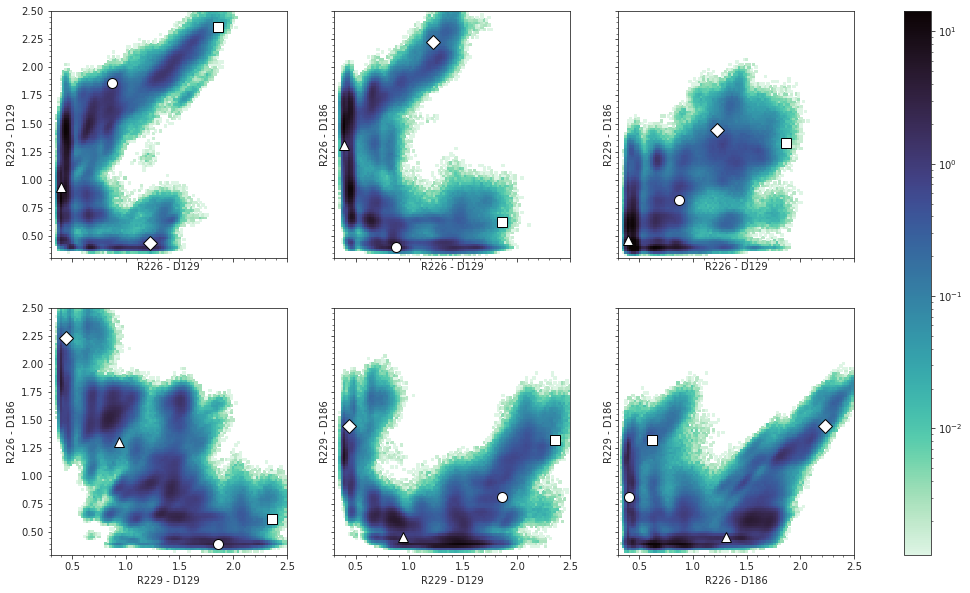

In [16]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

norm = mpl.colors.LogNorm()  # log scale
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        sb_arr[:, sb1],
        sb_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=norm,
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

f.colorbar(h, ax=axes.ravel().tolist())

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)

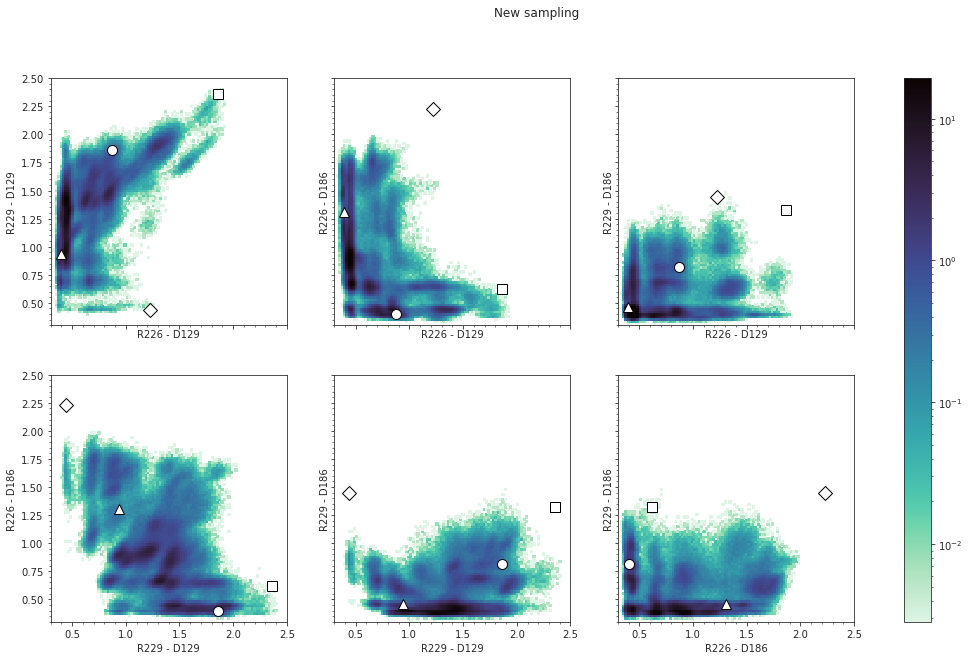

In [17]:
f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

norm = mpl.colors.LogNorm()  # log scale
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        sb_arr[e:, sb1],
        sb_arr[e:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=norm,
    )
    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

f.colorbar(h, ax=axes.ravel().tolist())
f.suptitle("New sampling")
axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)

In [20]:
nc_files = np.loadtxt("../../data/suppl_traj_files.txt", dtype=str)

In [45]:
new_seeds = []
for i in util.find_closest_points((-1, 10), cv_arr[e:], n=1):
    traj = i // 3000
    print(f"{nc_files[i // 3000]} {i % 3000}")
    new_seeds.append((i // 3000, i % 3000))

../../suppl-runs/117/civsd.nc 251


In [46]:
for i in util.find_closest_points((-2, 10), cv_arr[e:], n=2):
    traj = i // 3000
    print(f"{nc_files[i // 3000]} {i % 3000}")
    new_seeds.append((i // 3000, i % 3000))

../../suppl-runs/096/civsd-3.nc 2853
../../suppl-runs/096/civsd-3.nc 2855


In [47]:
for i in util.find_closest_points((-1, 20), cv_arr[e:], n=1):
    traj = i // 3000
    print(f"{nc_files[i // 3000]} {i % 3000}")
    new_seeds.append((i // 3000, i % 3000))

../../suppl-runs/105/civsd.nc 117


In [48]:
for i in util.find_closest_points((-2, 20), cv_arr[e:], n=1):
    traj = i // 3000
    print(f"{nc_files[i // 3000]} {i % 3000}")
    new_seeds.append((i // 3000, i % 3000))

../../suppl-runs/105/civsd.nc 274


In [49]:
for i in util.find_closest_points((-1, 15), cv_arr[e:], n=1):
    traj = i // 3000
    print(f"{nc_files[i // 3000]} {i % 3000}")
    new_seeds.append((i // 3000, i % 3000))

../../suppl-runs/106/civsd.nc 719


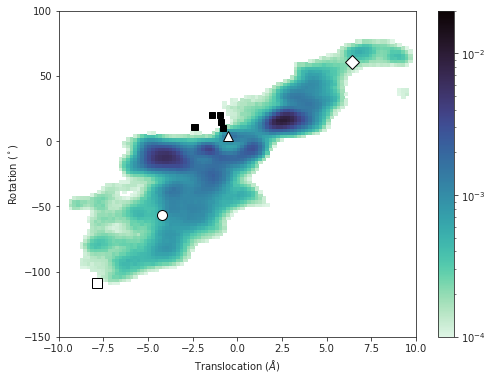

In [51]:
f, ax = plt.subplots(figsize=(8, 6))

norm = mpl.colors.LogNorm(vmin=1e-4, vmax=2e-2)
_, _, _, h = ax.hist2d(
    cv_arr[:, 0],
    cv_arr[:, 1],
    bins=100,
    range=[[-10, 10], [-150, 100]],
    cmin=0.0001,
    density=True,
    cmap="mako_r",
    norm=norm,
)
f.colorbar(h, ax=ax)
plotting.format_cvs(ax, centroids=True)

for (i, j) in new_seeds:
    ax.plot(cv_trajs[i + 237][j, 0], cv_trajs[i + 237][j, 1], "sk")

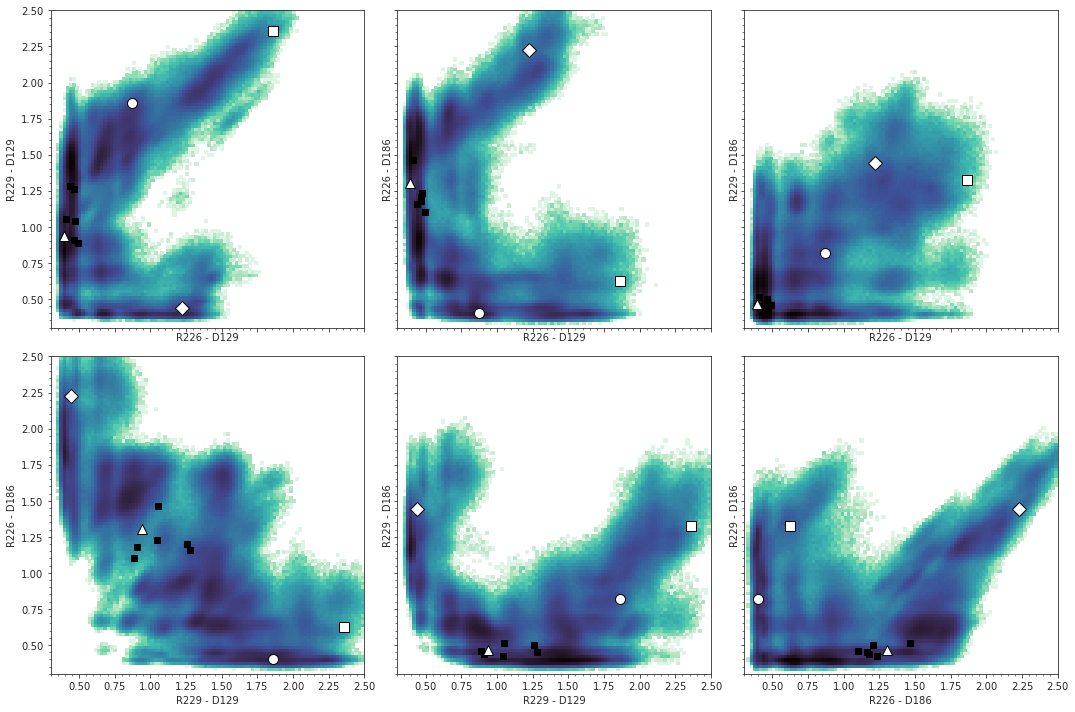

In [52]:
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

norm = mpl.colors.LogNorm()  # log scale
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    _, _, _, h = ax.hist2d(
        sb_arr[:, sb1],
        sb_arr[:, sb2],
        bins=100,
        range=[[0.3, 2.5], [0.3, 2.5]],
        cmin=0.001,
        density=True,
        cmap="mako_r",
        norm=norm,
    )

    ax.set(xlabel=f"{sb_labels[sb1 - 30]}", ylabel=f"{sb_labels[sb2 - 30]}")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    for (i, j) in new_seeds:
        ax.plot(sb_trajs[i + 237][j, sb1], sb_trajs[i + 237][j, sb2], "sk")

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
plotting.plot_sb_models(axes.flat, mode="du", centroids=True)
f.tight_layout()

In [53]:
new_seeds

[(34, 251), (115, 2853), (115, 2855), (22, 117), (22, 274), (23, 719)]

In [25]:
import mdtraj as md
import os

In [55]:
start_folder = 300
for n, (i, j) in enumerate(new_seeds):
    frame = md.load_netcdf(
        nc_files[i], top="../../suppl-runs/000/civsd.prmtop", frame=j
    )
    new_folder = f"../../suppl-runs/{str(start_folder + n).zfill(3)}"
    if not os.path.exists(new_folder):
        os.mkdir(new_folder)
    frame.save_pdb(f"{new_folder}/civsd.pdb")

# Find points closest to up and down states

In [14]:
centroids = np.loadtxt("../../models/MD-clustering-center/all.txt")

In [16]:
# down state
s = 3_000_000
down_i = util.find_closest_points(centroids[1], cv_arr[s:])[0]

In [17]:
traj = down_i // 3000
print(f"{traj_files[down_i // 3000]} {down_i % 3000}")

../../suppl-runs/271/civsd-3.nc 2506


In [21]:
frame = md.load_netcdf(
    "../../unbiased/271/civsd-3.nc", top="../../unbiased/test/civsd.pdb", frame=2506
)
frame.save_pdb("../../biased/smd-prep/down-seed.pdb")

In [22]:
# up state
up_i = util.find_closest_points(centroids[2], cv_arr[s:])[0]

In [23]:
traj = up_i // 3000
print(f"{traj_files[traj]} {up_i % 3000}")

../../suppl-runs/117/civsd.nc 430


In [24]:
frame = md.load_netcdf(
    "../../unbiased/117/civsd.nc", top="../../unbiased/test/civsd.pdb", frame=430
)
frame.save_pdb("../../biased/smd-prep/up-seed.pdb")

In [15]:
models = np.load("../../data/models_centroids_feat2.npy")

In [16]:
models.shape

(4, 60)

In [17]:
centroids.shape

(4, 2)

In [18]:
centroids_ds_sb = np.hstack((centroids, models))

In [19]:
centroids_ds_sb.shape

(4, 62)

In [20]:
data_ds_sb = np.hstack((cv_arr, sb_arr))

In [34]:
down_i_sb = util.find_closest_points(centroids_ds_sb[1], data_ds_sb[s:])[0]

In [35]:
print(f"{traj_files[down_i_sb // 3000]} {down_i_sb % 3000}")

../../suppl-runs/294/civsd-3.nc 2881


In [36]:
frame = md.load_netcdf(
    "../../unbiased/294/civsd-3.nc", top="../../unbiased/test/civsd.pdb", frame=2881
)
frame.save_pdb("../../biased/smd-prep/down-seed2.pdb")

In [37]:
up_i_sb = util.find_closest_points(centroids_ds_sb[2], data_ds_sb[s:])[0]

In [38]:
print(f"{traj_files[up_i_sb // 3000]} {up_i_sb % 3000}")

../../suppl-runs/117/civsd.nc 539


In [39]:
frame = md.load_netcdf(
    "../../unbiased/117/civsd.nc", top="../../unbiased/test/civsd.pdb", frame=539
)
frame.save_pdb("../../biased/smd-prep/up-seed2.pdb")

In [47]:
[sb_labels[i - 30] for i in sb_ids]

['R226 - D129', 'R229 - D129', 'R226 - D186', 'R229 - D186']

In [41]:
sb_ids = [42, 48, 47, 53]

In [43]:
sb_arr[down_i_sb, sb_ids]

array([0.46269333, 1.4729024 , 0.8962823 , 0.73807454], dtype=float32)

In [44]:
sb_arr[up_i_sb, sb_ids]

array([0.45861518, 1.1524085 , 0.8433227 , 0.3792704 ], dtype=float32)

In [48]:
frame = md.load_netcdf(
    "../../unbiased/117/civsd.nc", top="../../biased/smd-prep/civsd.prmtop", frame=539
)
frame.save_pdb("../../biased/smd-prep/up-seed2.pdb")

In [49]:
top = md.load_prmtop("../../biased/smd-prep/civsd.prmtop")

In [55]:
atom = next(top.atoms)

In [57]:
atom.

GLN0

In [22]:
s = 3000000
upp_i_sb = util.find_closest_points(centroids_ds_sb[3], data_ds_sb[s:])[0]

In [23]:
print(f"{traj_files[upp_i_sb // 3000]} {upp_i_sb % 3000}")

../../suppl-runs/135/civsd.nc 68


In [27]:
frame = md.load_netcdf(
    "../../unbiased/135/civsd.nc", top="../../biased/smd-prep/down-seed.pdb", frame=68
)
frame.save_pdb("../../biased/smd-prep/upplus-seed.pdb")